# Packages

In [42]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri


In [43]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [44]:
import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT



# R Different Populations

In [45]:
%%R
#install.packages("sampling")
library(sampling)

In [46]:
ro.r('library(sampling)')
ro.r('n_percent = .05')


sampling = importr('sampling')
ro.r('library(sampling)')


ro.r('x1 = swiss$Education')
ro.r('y1 = swiss$Examination')




#ro.r('rand_seed = sample(length(x1))')
#ro.r('x1 = x1[rand_seed]')
#ro.r('y1 = y1[rand_seed]')

x1 = np.array(ro.r('x1'))
y1 = np.array(ro.r('y1'))

ro.r('N1 = length(x1)')
N1 = ro.r('N1')
ro.r('n1 = round(n_percent * N1)')
n1 = ro.r('n1')
ro.r('inclusions1 = inclusionprobabilities(x1, n1)')

inclusions1 = ro.r("inclusions1")

inclusions1[inclusions1 == 0] = 1e-4
print(np.corrcoef(x1, y1)[0,1])





# SWISS
#https://search.r-project.org/CRAN/refmans/sampling/html/swissmunicipalities.html
ro.r('data(swissmunicipalities)')
ro.r('y2 = swissmunicipalities$Airbat')
ro.r('x2 = swissmunicipalities$Pop020')
ro.r('v2 = swissmunicipalities$Airind')
ro.r('h2 = swissmunicipalities$H00P01')
ro.r('w2 = swissmunicipalities$H00P04')


x2 = np.array(ro.r('x2'))
y2 = np.array(ro.r('y2'))
v2 = np.array(ro.r('v2'))
w2 = np.array(ro.r('w2'))
h2 = np.array(ro.r('h2'))

ro.r('N2 = length(x2)')
N2 = ro.r('N2')
ro.r('n2 = round(n_percent * N2)')
n2 = ro.r('n2')
ro.r('inclusions2 = inclusionprobabilities(x2, n2)')
inclusions2 = ro.r("inclusions2")

inclusions2[inclusions2 == 0] = 1e-4
print(np.corrcoef(x2, y2)[0,1])






#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')


x3 = np.array(ro.r('x3'))
y3 = np.array(ro.r('y3'))
v3 = np.array(ro.r('v3'))
w3 = np.array(ro.r('w3'))
h3 = np.array(ro.r('h3'))

ro.r('N3 = length(x3)')
N3 = ro.r('N3')
ro.r('n3 = round(n_percent * N3)')
n3 = ro.r('n3')
#ro.r('inclusions3 = inclusionprobabilities(x3 + runif(N3, -1,1), n3)')
ro.r('inclusions3 = inclusionprobabilities(x3, n3)')

inclusions3 = ro.r("inclusions3")
inclusions3[inclusions3 == 0] = 1e-4
ro.r('print(cor(x3,y3))')






#simu
ro.r('x4 = rnorm(100, 200, 5)')
ro.r('y4 = x4 + runif(100, -5, 5)')
ro.r('z4 = x4 + runif(100, -5, 5)')

ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x4))')
ro.r('x4 = x4[rand_seed]')
ro.r('y4 = y4[rand_seed]')
ro.r('z4 = z4[rand_seed]')

x4 = np.array(ro.r('x4'))
y4 = np.array(ro.r('y4'))
z4 = np.array(ro.r('z4'))

ro.r('N4 = length(x4)')
N4 = ro.r('N4')
ro.r('n4 = round(n_percent * N4)')
n4 = ro.r('n4')
ro.r('inclusions4 = inclusionprobabilities(x4, n4)')
inclusions4 = ro.r("inclusions4")
inclusions4[inclusions4 == 0] = 1e-4





#MU284 Sweden
ro.r('data(MU284)')
ro.r('y5 = MU284$RMT85')
ro.r('x5 = MU284$P85')
ro.r('g5 = MU284$P75')
ro.r('v5 = MU284$S82')
ro.r('h5 = MU284$ME84')
ro.r('w5 = MU284$REV84')



y5 = np.array(ro.r('y5'))
x5 = np.array(ro.r('x5'))
g5 = np.array(ro.r('g5'))
v5 = np.array(ro.r('v5'))
h5 = np.array(ro.r('h5'))
w5 = np.array(ro.r('w5'))


ro.r('N5 = length(x5)')
N5 = ro.r('N5')
ro.r('n5 = round(n_percent * N5)')
n5 = ro.r('n5')
ro.r('inclusions5 = inclusionprobabilities(x5, n5)')
inclusions5 = ro.r("inclusions5")
inclusions5[inclusions5 == 0] = 1e-4



#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')



#small simu
ro.r('x6 = c(1,2,3,4,5,6,7,8,9,10)')
ro.r('y6 = c(10,27,30,4,57,60,70,83,80,130)')

x6 = np.array(ro.r('x6'))
y6 = np.array(ro.r('y6'))

ro.r('N6 = length(x6)')
N6 = ro.r('N6')
ro.r('n6 = 3')
n6 = ro.r('n6')
ro.r('inclusions6 = inclusionprobabilities(x6, n6)')
inclusions6 = ro.r("inclusions6")
inclusions6[inclusions6 == 0] = 1e-4



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/local/lib/R/site-library’ contains no packages



0.6984152962884828
0.9421664139113467
[1] 0.9750693


In [47]:
%%R
swiss_big = 0
swiss_small = 0
if (swiss_big == 1){
# Swiss
data(swissmunicipalities)
y2 = swissmunicipalities$Airbat
x2 = swissmunicipalities$Pop020
v2 = swissmunicipalities$Airind
h2 = swissmunicipalities$H00P01
w2 = swissmunicipalities$H00P04
N = length(y2)
n_percent = .05
n = round(n_percent * N)
n = 10


#1 Great
y <- y2; z <- x2; p <- h2

}


if (swiss_small == 1){
# Swiss
print(cor(swiss))
x1 = -swiss$Education
y1 = -swiss$Examination
h1 = swiss$Agriculture
N = length(y1)
n_percent = .05
n = round(n_percent * N)
n = 5


#1 Great
y <- y1; z <- x1; p <- h1

}


# Simu The best

## R Popu

[1] 0.7110757
[1] 0.8136454
[1] 0.9205719
[1] 0.7254931
[1] 0.8346199
[1] 0.9288661
[1] 0.2793896


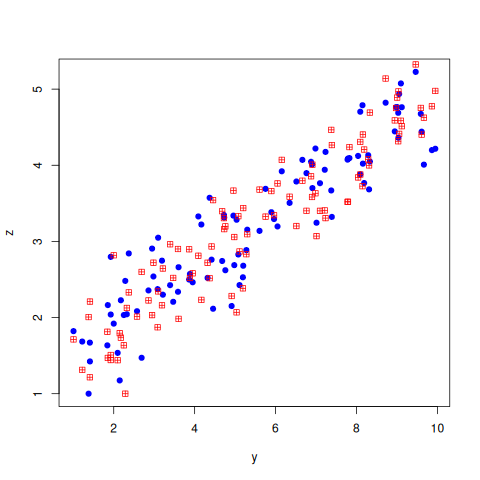

In [48]:
%%R

library(sampling)

set.seed(123)
N <- 100

# Generate a positive y
y <- runif(N, 1, 10) # all positive

# Function to generate variable with specified correlation to y
make_correlated_pos <- function(y, rho) {
  x <- rnorm(N)
  z <- rho * scale(y) + sqrt(1 - rho^2) * scale(x)
  # Rescale to positive
  zmin <- min(z)
  z_pos <- as.numeric(z - zmin + 1)
  return(z_pos)
}

# Three z's with desired correlations
z1 <- make_correlated_pos(y, 0.72)
z2 <- make_correlated_pos(y, 0.82)
z3 <- make_correlated_pos(y, .92)

# Three p's with desired correlations
p1 <- make_correlated_pos(y, 0.72)
p2 <- make_correlated_pos(y, 0.82)
p3 <- make_correlated_pos(y, 0.92)
p0 = rep(1, N)

# Check correlations
print(cor(y, z1))
print(cor(y, z2))
print(cor(y, z3))
print(cor(y, p1))
print(cor(y, p2))
print(cor(y, p3))

# Now you have y, z1, z2, z3, p1, p2, p3
# To access a scenario, e.g., scenario 1: y, z1, p1
scenario1 <- data.frame(y, z=z1, p=p1)
# scenario 2: y, z1, p2
scenario2 <- data.frame(y, z=z1, p=p2)
# ...and so on for all 9 combinations
z = z3
p = p3
# Example of one scenario output
# y = (y - mean(y))/ sd(y)
# z = (z - mean(z))/ sd(z)

# y = y/ sd(y)
# z = z/ sd(z)
n = 5
N = length(y)
pik = inclusionprobabilities(p, n)

#print(cbind(p,pik))
plot(y, z, col='blue', pch=19, xlab='y', ylab='z')
points(y, p, col='red', pch=12, xlab='y', ylab='z')
points(z/pik, y/pik, col='green', pch = 2)
print(cor(z/pik, y/pik))

cor(y, z_origin):  0.8191052 
cor(y, z_lin):  0.8191052 
cor(y, p):  0.7898662 


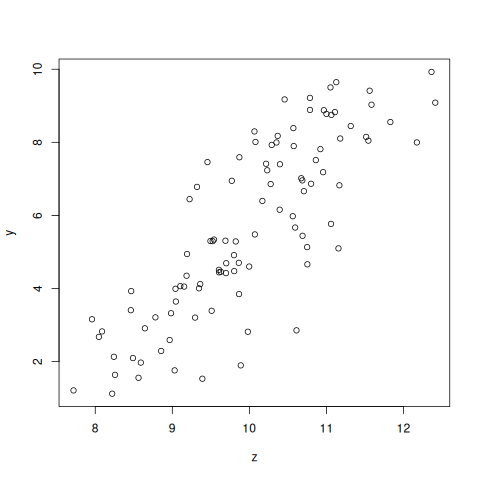

In [ ]:
%%R
set.seed(1)
N <- 100
n = 5
y <- runif(N, 1, 10)      # or whatever y you want
rho_z <- 0.8
rho_p <- 0.8  
intercept <- 10            
origin = 0


# ---- 1. Correlated z, regression through origin ----
x <- rnorm(N)
z_origin <- as.numeric(scale(y)) * rho_z + as.numeric(scale(x)) * sqrt(1 - rho_z^2)
ifelse(origin == 1,
z <- as.numeric(z_origin - min(z_origin) + 1)   # make positive (if you want)
,z <- z_origin + intercept)
z_origine <- as.numeric(z_origin - min(z_origin) + 1)
z_lin <- z_origin + intercept
# ---- 3. Correlated p ----
p <- as.numeric(scale(y)) * rho_p + as.numeric(scale(rnorm(N))) * sqrt(1 - rho_p^2)
p <- as.numeric(p - min(p) + 1)   # make positive
pik = inclusionprobabilities(p, n)
# ---- Ready to use variables ----
cat("cor(y, z_origin): ", cor(y, z_origin), "\n")
cat("cor(y, z_lin): ", cor(y, z_lin), "\n")
cat("cor(y, p): ", cor(y, p), "\n")
plot(z, y)

In [88]:
%%R

print(cor(z, y))
print(cor(z/pik, y/pik))

pikl_sys = UPsystematicpi2(pik)
pikl_max = UPmaxentropypi2(pik)
pikl_mid = UPmidzunopi2(pik)
pikl_til = UPtillepi2(pik)

z_hat = z / pik

var__sys <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__max <- t(z_hat) %*% (pikl_max - (pik %*% t(pik))) %*% z_hat
var__mid <- t(z_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% z_hat
var__til <- t(z_hat) %*% (pikl_til - (pik %*% t(pik))) %*% z_hat
var__srs <- (N**2)*(1-n/N)*(1/n)*var(z)

y_hat = y/pik

var__sys_y <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
var__max_y <- t(y_hat) %*% (pikl_max - (pik %*% t(pik))) %*% y_hat
var__mid_y <- t(y_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% y_hat
var__til_y <- t(y_hat) %*% (pikl_til - (pik %*% t(pik))) %*% y_hat
var__srs_y <- (N**2)*(1-n/N)*(1/n)*var(y)




var_z = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z) = c('sysxy', 'maxxy', 'midxy', 'tilxy', 'srsxy')
threshold_z = min(var_z[var_z>0])

var_y = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y )
names(var_y) = c('sysy', 'maxy', 'midy', 'tily', 'srsy')
threshold_y = min(var_y[var_y>0])



[1] 0.8191052


[1] 0.004722015


In [89]:
%%R
Ppi <- function(Pi) {
  
  N <- length(Pi)
  #SOME ERROR MESSAGES
  if (N < 2) {
    rlang::abort("The sampling designs should be define on a set of more than one element. (length(Pi) > 1)")
  }
  
  for (k in 1:N) {
    if (Pi[k] >= 1 | Pi[k] <= 0) {
      rlang::abort("Pi is not a vector of probabilities (0 <= p < 1)")
    }
  }
  
  if (as.integer(round( sum(Pi) , 9)) - round( sum(Pi) , 9) != 0) {
    rlang::abort("The sum of the first order inclusion probabilities should be an integer")
  }
  
  
  s <- c()
  c <- c()
  kr <- c()
  alpha <-c()
  sum <-0
  r<-1
  r_prev<-0
  n_<-sum(Pi)
  
  for (k in 1:N) {
    prev_sum<-sum
    sum<-sum+Pi[k]
    if (sum>=r)
    {
      kr[r] <- k
      alpha[k] <-r-prev_sum
      
      int <- sqrt( (1 - Pi[k]) / (1 - alpha[k]) )
      s[k] <- round(int, 8)
      r_prev<-r
      r<-r+1
    }
    
    else {
      inter <- sqrt( Pi[k] / (r_prev + 1 - prev_sum) )
      s[k] <- round(inter, digits = 15)
    }
    
    c[k] <- sqrt(1 - s[k]^2)
    
  }
  
  # ce point n'est pas joli, mais je n'ai pas trouvé l'erreur. A retravailler..
  #print(kr)
  if(max(kr)!=length(Pi)){
    kr<-cbind(kr,length(Pi))
    r<-r+1
    r_prev<-r_prev+1}
  #print(kr)
  V <- matrix(0, nrow = N , ncol = r_prev)
  V[1, 1] = 1
  if ((r_prev-1) != 0) {
    for (r in 1:(r_prev-1)) {
      V[kr[r] + 1, r + 1] = 1
    }
  }
  
  for (k in 1:(N-1)) {
    L <- V[k, ]
    M <- V[k + 1,]
    V[k, ] <- s[k] * L - c[k] * M
    V[k + 1, ] <- c[k] * L + s[k] * M
  }
  return(V)
}




Drawing_Dsd <- function(v, s = 1, B = FALSE, seed = NULL){
  
  
  if (is.numeric(v)) {
    return(.dsd_sampling_mult(v, s, B, seed))
  }
  else{ return(.dsd_sampling_mult_complex(v, s, B, seed))}
}


.dsd_sampling_mult_complex <- function(v, s, B, seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C_complex(v, B, seed))
  }
  
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C_complex(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}


.dsd_sampling_mult <- function(v = NULL, s, B,seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C(v, B, seed))
  }
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}

.dsd_sampling_01_B_C_complex <- function(v, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #Step 1: Sampling the first element
  w <- v
  
  total <- 0
  i <- 0
  pi1 <- Re( diag( v %*% t(Conj(v)) ) )
  
  if (length(pi1[pi1 < 0]) != 0 | length(pi1[pi1 >= 1]) != 0) {
    rlang::abort("The matrix v given as input doesn't suit to the input expected (See the functions pgd and periodic_dsd)")
  }
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  M <- v[i,]
  e1 <- M / c(Re (sqrt (t(M) %*% Conj(M)) ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- v %*% Conj(e1)
    pi1 <- pi1 - t(inter * Conj(inter))
    pi2 <- Re( 1 / r*pi1 )
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    w <- w - t( t(Conj(e1)) %*% t(w) ) %*% t(e1)
    L <- w[i, ]
    e1 <- L / c(Re(sqrt (t(L) %*% Conj(L) )))
    
  }
  
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}
.dsd_sampling_01_B_C <- function(v = NULL, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #First step: Sampling the first element
  w <- v
  
  
  total <- 0
  i <- 0
  pi1 <- diag(v  %*% t(v))
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  
  l <- v[i,]
  e1 <- l / as.numeric( sqrt( t(l) %*% l ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- (v %*% e1)
    pi1 <- pi1 - t( inter * inter )
    pi2 <- 1 / r * pi1
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    
    w <- w - (w %*% e1) %*% t(e1)
    L <- w[i,]
    e1 <- L / as.numeric( sqrt( t(L) %*% L ))
    
  }
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}

In [90]:
%%R
library(sampling)



#pik <- inclusionprobabilities(p, n)

sort_index <- order(z / pik, decreasing = TRUE)
sort_index <- order(y / pik, decreasing = TRUE)
sort_index <- order(y, decreasing = TRUE)

y <- y[sort_index]; z <- z[sort_index]; pik <- pik[sort_index]; p = p[sort_index]
ones = rep(1, N)
print(cor(y, z))
print(cor(y, p))
N <- length(y)


Base <- Ppi(pik)
Ppi_mat <- Base %*% t(Base)

# Variance matrix formula
Dpi_inv <- diag(1 / pik)
I_N <- diag(N)
A <- (I_N - Ppi_mat) * Ppi_mat
var_ht_z <- as.numeric(t(z) %*% Dpi_inv %*% A %*% Dpi_inv %*% z)
cat("Variance of HT estimator via DSD formula_z: ", var_ht_z, "\n")

var_ht <- as.numeric(t(y) %*% Dpi_inv %*% A %*% Dpi_inv %*% y)
cat("Variance of HT estimator via DSD formula: ", var_ht, "\n")


# Monte Carlo
# Number of repetitions
m <- 2000
ht_estimates_dsd_y <- numeric(m)
ht_estimates_dsd_z <- numeric(m)
ht_estimates_cube_y <- numeric(m)
ht_estimates_cube_z <- numeric(m)

for (i in 1:m) {
  # --- Determinantal Sampling ---
  samp <- Drawing_Dsd(Base, s = n, B = TRUE)
  sel_idx <- which(samp[, 1] == 1)  # Adjust if needed
  ht_estimates_dsd_y[i] <- sum(y[sel_idx] / pik[sel_idx])
  ht_estimates_dsd_z[i] <- sum(z[sel_idx] / pik[sel_idx])
  
  # --- Cube Method Sampling ---
  # If you want to balance on z, make sure to use cube method with z in the auxiliary matrix
  cube_sample <- samplecube(cbind(pik, ones, z), pik, comment = FALSE)
  sel_cube <- which(cube_sample == 1)
  ht_estimates_cube_y[i] <- sum(y[sel_cube] / pik[sel_cube])
  ht_estimates_cube_z[i] <- sum(z[sel_cube] / pik[sel_cube])
}
var_y_0 = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y)
names(var_y_0) = c('syszy', 'maxzy', 'midzy', 'tilzy', 'srszy')

var_z_0 = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z_0) = c('sysz', 'maxz', 'midz', 'tilz', 'srsz')

threshold_z = min(var_z_0)
threshold_y = min(var_y_0)

# --- Variance and Mean calculations ---
var_dsd_y   <- var(ht_estimates_dsd_y)
var_cube_y  <- var(ht_estimates_cube_y)
var_dsd_z   <- var(ht_estimates_dsd_z)
var_cube_z  <- var(ht_estimates_cube_z)
mean_dsd_y  <- mean(ht_estimates_dsd_y)
mean_cube_y <- mean(ht_estimates_cube_y)
mean_dsd_z  <- mean(ht_estimates_dsd_z)
mean_cube_z <- mean(ht_estimates_cube_z)

cat("Here is the Vincent Efficiency y:\n")
eff_dsd_y <- min(var_y_0[var_y_0>0]) / var_ht
eff_dsd_z <- min(var_z_0[var_z_0>0]) / var_ht_z
cat(sprintf("  DSD_y:  %.5f\n  DSD_z: %.5f\n", eff_dsd_y, eff_dsd_z))


cat("Monte Carlo variance of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_y, var_cube_y))

eff_dsd_y <- min(var_y_0) / var_dsd_y
eff_cube_y <- min(var_y_0) / var_cube_y

cat("Monte Carlo efficiency of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_y, eff_cube_y))

cat("Monte Carlo mean of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_y, mean_cube_y))
cat(sprintf("  Actual total of y: %.5f\n", sum(y)))

cat("\nMonte Carlo variance of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_z, var_cube_z))

eff_dsd_z <- min(var_z_0) / var_dsd_z
eff_cube_z <- min(var_z_0) / var_cube_z

cat("Monte Carlo efficiency of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_z, eff_cube_z))

cat("Monte Carlo mean of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_z, mean_cube_z))
cat(sprintf("  Actual total of z: %.5f\n", sum(z)))

results = round(c(var__srs/min(var_z_0[-5]), var__srs/var_cube_z, var__srs/var_ht_z,  var__srs_y/min(var_y_0[-5]), var__srs_y/var_cube_y,var__srs_y/var_ht ),2)
names(results) = c('eff_GFS_0_z','eff_cube_z', 'eff_dsd_z', 'eff_GFS_0_y' , 'eff_cube_y','eff_dsd_y')
print(results)

[1] 0.8191052
[1] 0.7898662
Variance of HT estimator via DSD formula_z:  3756.66 
Variance of HT estimator via DSD formula:  863.7677 
Here is the Vincent Efficiency y:
  DSD_y:  1.77925
  DSD_z: 0.26002
Monte Carlo variance of HT estimator for y:
  DSD:  881.41755
  Cube: 1430.65574
Monte Carlo efficiency of HT estimator for y:
  DSD:  1.74362
  Cube: 1.07423
Monte Carlo mean of HT estimator for y:
  DSD:  566.23836
  Cube: 567.53177
  Actual total of y: 566.06236

Monte Carlo variance of HT estimator for z:
  DSD:  3869.79508
  Cube: 1339.35039
Monte Carlo efficiency of HT estimator for z:
  DSD:  0.25242
  Cube: 0.72932
Monte Carlo mean of HT estimator for z:
  DSD:  999.86484
  Cube: 998.83218
  Actual total of z: 1000.00000
eff_GFS_0_z  eff_cube_z   eff_dsd_z eff_GFS_0_y  eff_cube_y   eff_dsd_y 
       0.22        0.73        0.26        3.40        3.65        6.04 


In [91]:
%%R

z_hat = z / pik
y_hat = y / pik
pikl_sys = UPsystematicpi2(pik)

var__sys_z_test <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__sys_y_test <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
print(var__srs/var__sys_z_test)
print(var__srs_y/var__sys_y_test)

print(var_ht_z / var__sys_z_test)
print(var_ht / var__sys_y_test)

          [,1]
[1,] 0.4622492
         [,1]
[1,] 4.210327
         [,1]


[1,] 1.777722
          [,1]
[1,] 0.6967267


## Astar

/tmp/ipykernel_16538/3831208405.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  swap_units             = int(N/10)


cor(y, z) 0.8191052011925352
cor(y, inclusions) 0.7898661849073543
2000 5 200000 0.9 0.9


Generating initial designs: 100%|██████████| 1/1 [00:00<00:00, 392.98it/s]

Initial design 0: method = Original, efficiency z = 1.7777, y=0.6967
New best at idx=0: method = Original, efficiency z = 1.7777 and efficiency y = 0.6967

Progress: 0.1% 
=== Best Solution Updated at Iteration 1 ===
  Best Cost (z):       2090.651
  Best Cost (y):       1473.381
  rho (z, y):       0.819
  rho (p, y):       0.79
  Criteria Value:      2090.651
  Efficiency z (0→f):  1.778 → 1.778 → 1.7969
  Efficiency y (0→f):  0.697 → 0.697 → 0.5862
  Efficiency z (srs):  0.458 → 1.778 → 0.4626
  Efficiency y (srs):  4.168 → 0.697 → 3.5073
  Alpha:               None
  Num changes:         None
  Design Depth:        2
  Design Size (|D|):   104
  Open set size:       9

Progress: 2.5% 
=== Best Solution Updated at Iteration 50 ===
  Best Cost (z):       1975.359
  Best Cost (y):       2065.9086
  rho (z, y):       0.819
  rho (p, y):       0.79
  Criteria Value:      1975.359
  Efficiency z (0→f):  1.778 → 1.778 → 1.9018
  Efficiency y (0→f):  0.697 → 0.697 → 0.4181
  Efficiency z (

Progress: 3.5% 
=== Best Solution Updated at Iteration 70 ===
  Best Cost (z):       1863.992
  Best Cost (y):       1843.2364
  rho (z, y):       0.819
  rho (p, y):       0.79
  Criteria Value:      1863.992
  Efficiency z (0→f):  1.778 → 1.778 → 2.0154
  Efficiency y (0→f):  0.697 → 0.697 → 0.4686
  Efficiency z (srs):  0.458 → 1.778 → 0.5188
  Efficiency y (srs):  4.168 → 0.697 → 2.8035
  Alpha:               0.9
  Num changes:         1
  Design Depth:        44
  Design Size (|D|):   188
  Open set size:       275


=== Best Solution Updated at Iteration 70 ===
  Best Cost (z):       1863.866
  Best Cost (y):       1825.1796
  rho (z, y):       0.819
  rho (p, y):       0.79
  Criteria Value:      1863.866
  Efficiency z (0→f):  1.778 → 1.778 → 2.0155
  Efficiency y (0→f):  0.697 → 0.697 → 0.4733
  Efficiency z (srs):  0.458 → 1.778 → 0.5188
  Efficiency y (srs):  4.168 → 0.697 → 2.8313
  Alpha:               0.9
  Num changes:         1
  Design Depth:        44
  Design Size (|

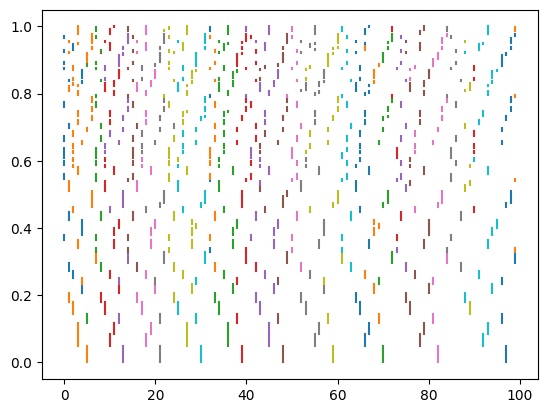

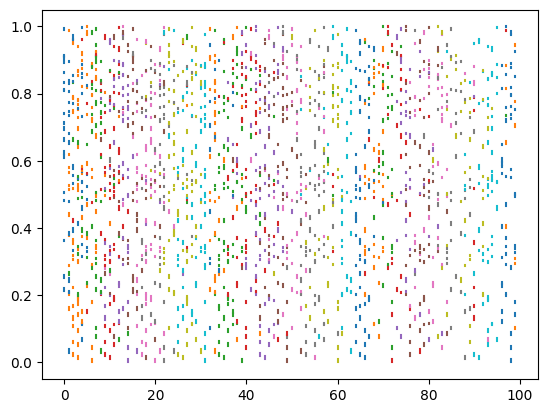

In [92]:
y = np.array(ro.r['y'])
z = np.array(ro.r['z'])
inclusions = np.array(ro.r['pik'])

print('cor(y, z)', np.corrcoef(y, z)[0, 1])
print('cor(y, inclusions)', np.corrcoef(y, inclusions)[0, 1])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
var_z_0 = np.array(ro.r['var_z_0'])
eff_dsd_z = float(ro.r['eff_dsd_z'][0])
eff_dsd_y = float(ro.r['eff_dsd_y'][0])
inclusions = np.array(ro.r['pik'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_y = ro.r['threshold_y']
threshold_z = float(ro.r['var_ht_z'][0])
threshold_y = float(ro.r['var_ht'][0])

inclusions = np.array(inclusions)

import numpy as np

num_new_nodes          = 5
num_changes_lower      = 1
num_changes_upper      = 1
max_open_set_size      = 200000
switch_lower           = .9
switch_upper           = .9
max_iterations         = 2000
num_initial_nodes      = 1
initial_design_to_use  = 1
num_top_restart_nodes  = 10
stuck_fraction         = 0.1

swap_iterations        = int(np.round(.7 * num_initial_nodes))  # ensure integer!
swap_distance          = 3
swap_units             = int(N/10)







show_results           = 1
random_restart_period  = 10000   # how often to inject random designs
random_injection_count = 500     # how many random designs to inject
prune_fraction         = .9
var_percent_exected    = (1/eff_dsd_z) * .1  # how much of the variance to expect in the best design



rng = np.random.default_rng()  # Recommended for controlled/stable random runs
print(max_iterations, num_new_nodes, max_open_set_size, switch_lower, switch_upper)

# You must define y, z, inclusions, threshold_z, threshold_y earlier in your notebook or script.

# Criterion must be set up per your class structure.
criterion = VarNHT(main_variable=y, auxiliary_variable=z, inclusion_probability=inclusions, balance_method='original')

astar = AStar(
    inclusions              = inclusions,
    num_initial_nodes       = num_initial_nodes,
    initial_design_to_use   = initial_design_to_use,
    criteria                = criterion,
    z                       = z,
    y                       = y,
    threshold_z             = threshold_z,
    threshold_y             = threshold_y,
    switch_lower            = switch_lower,
    switch_upper            = switch_upper,
    num_changes_lower       = num_changes_lower,
    num_changes_upper       = num_changes_upper,
    show_results            = show_results,
    var_percent_exected     = var_percent_exected,
    swap_iterations         = swap_iterations,
    swap_distance           = swap_distance,
    swap_units              = swap_units,
    rng                     = rng,                
    # atomize                 = False,                        
    # delta                   = 0.01,                         
)

result = astar.run(
    max_iterations             = max_iterations,
    num_new_nodes              = num_new_nodes,
    max_open_set_size          = max_open_set_size,
    random_restart_period      = random_restart_period,
    random_injection_count     = random_injection_count,
    prune_fraction             = prune_fraction,
    num_top_restart_nodes      = num_top_restart_nodes,
    stuck_fraction             = stuck_fraction,

)

print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
# print(np.round(var_z_0, 1))
# print(np.round(var_y_0, 1))
astar.initial_design.show()
astar.best_design.show()

In [98]:
import pandas as pd
print("size of init design",len(list(astar.initial_design)))
print("size of best design", len(list(astar.best_design)))
#print(astar.initial_design.criteria_value())
print(astar.criteria(astar.initial_design))
print(astar.criteria(astar.best_design))
print(N)
inclusions = np.array(ro.r['pik'])

for k in range(int(N)):
    size_last = 0
    prob_last = 0
    len_last = 0
    prob_last_second = 0
    prob = 0
    z_ests = []
    y_ests = []
    probs  = []
    for item in astar.best_design:
        prob += item.probability
        size_last += 1
        len_last += len(item.ids)
        probs.append(item.probability)
        ids = np.array(list(item.ids), dtype=int)
        z_ests.append(np.sum(z[ids]/inclusions[ids]))
        y_ests.append(np.sum(y[ids]/inclusions[ids]))
            
        if k in item.ids:
            
            #print(np.round(np.sum(y[ids]/inclusions[ids])), np.round(np.sum(z[ids]/inclusions[ids])))
            prob_last += item.probability
            if k+1 in item.ids:
                prob_last_second += item.probability
        #print(item)
    size_ini = 0
    prob_ini = 0
    len_ini = 0
    prob_ini_second = 0
    for item in astar.initial_design:
        len_ini += len(item.ids)
        size_ini += 1
        if k in item.ids:
            print(item.probability)
            prob_ini += item.probability
            if k+1 in item.ids:
                prob_ini_second += item.probability
        #print(item)
    #print(np.round(prob_last, 3), np.round(prob_ini, 3), np.round(inclusions[k], 3))
    if  not (len_last%n == 0 and len_ini%n == 0 and 
        np.round(prob_last, 3) == np.round(prob_ini, 3) and 
        np.round(prob_last, 3) == np.round(inclusions[k], 3)):
        print('yessssss')
print(prob)
print('n = ', n)
print(pd.concat([pd.Series(z_ests), pd.Series(y_ests), pd.Series(probs)], axis=1))
y_ests = np.array(y_ests)
z_ests = np.array(z_ests)
probs = np.array(probs)
print(np.sum(y), np.sum(z), np.sum(y_ests*probs), np.sum(z_ests*probs))
print('var z estimates', np.round(np.sum(z_ests**2*probs)-np.sum(z_ests*probs)**2, 3))
print('var y estimates', np.round(np.sum(y_ests**2*probs)-np.sum(y_ests*probs)**2, 3))

size of init design 100
size of best design 326
2113.187790599218
1478.0328324588206
[100]
0.015550537
0.014953086
0.01205362
0.016331871
0.009622886
0.014790391
0.012923879
0.000377624
0.003098908
0.004648853
0.005351544
0.005646472
0.000762115
yessssss
0.028239389
0.023464623
0.021325228
0.018131038
0.011283096
0.013732229
0.002290472
0.011454795
0.002862305
0.001552651
0.002738837
0.000710505
0.002169437
yessssss
0.034890969
0.022905397
0.016144281
0.006083493
0.008814554
0.006112007
0.009577899
0.014303756
0.005230948
0.00567442
0.002171234
0.00357093
0.001317273
0.003041237
0.010339668
yessssss
0.037707135
0.031944913
0.023036213
0.019706806
0.011096699
0.010637787
0.004434154
0.00832272
0.005863833
0.003675711
5.9749e-05
0.001373358
0.007428713
0.003747104
0.000788603
yessssss
0.025555317
0.018134871
0.02198896
0.011083913
0.012459871
0.009700699
0.001043628
0.000675622
0.003312664
0.002368119
0.016309355
0.002932532
0.00183884
0.001959323
yessssss
0.047748541
0.026233399
0.00961

/tmp/ipykernel_16538/52101114.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for k in range(int(N)):


0.037707135
0.010637787
0.004434154
0.001373358
yessssss
0.031944913
0.023036213
0.019706806
0.00832272
0.005863833
0.003675711
0.007428713
0.003747104
0.000788603
yessssss
0.025555317
0.02198896
5.9749e-05
0.001043628
0.000675622
0.003312664
0.002368119
0.016309355
0.002932532
yessssss
0.011083913
0.012459871
0.00183884
0.001959323
yessssss
0.026233399
0.018134871
0.009700699
0.009613069
0.007523268
0.001156659
0.007438721
0.01180412
yessssss
0.047748541
0.013302194
0.008625457
0.002444352
0.003952196
0.000138987
0.001406378
0.000688701
yessssss
0.019563554
0.013857925
0.012504649
0.017213379
0.00209009
0.002534026
0.004233625
0.009766734
yessssss
0.032846142
0.011303487
0.007141943
0.003513401
0.007106839
5.4426e-05
0.00345024
0.005311823
yessssss
0.999999994
n =  [10.]
               0            1         2
0    4599.595174  3096.018764  0.010011
1    3933.587430  2877.671301  0.009987
2    1215.105706   751.065858  0.008815
3    1663.956161  1134.719184  0.009987
4    3844.494026 

In [100]:
print(np.sum(inclusions))

10.0


In [96]:
%%R
x = rnorm(100, 200, 5)
z = (x - mean(x))/ sd(x)
z = (x)/ sd(x)
pik = inclusionprobabilities(runif(100), 10)
n = 10
N = length(x)
est_x = array(0, 100)
est_z = array(0, 100)

est_x_srs = array(0, 100)
est_z_srs = array(0, 100)

for (i in 1:100){
  s = UPmaxentropy(pik)
  est_x[i] = sum(x[s==1]/pik[s==1])
  est_z[i] = sum(z[s==1]/pik[s==1])

  s_srs = srswor(n,N)
  est_x_srs[i] = N * mean(x[s_srs==1])
  est_z_srs[i] = N * mean(z[s_srs==1])

}
print(cbind(est_x, est_z))

print(c(mean(est_x), mean(est_z)))
print(c(var(est_x), var(est_z)))

print(c(mean(est_x_srs), mean(est_z_srs)))
print(c(var(est_x_srs), var(est_z_srs)))

print(c(var(est_x_srs)/var(est_x), var(est_z_srs)/var(est_z)))
print(c(sum(x), sum(z)))

          est_x     est_z
  [1,] 20009.53  3844.582
  [2,] 17588.81  3379.471
  [3,] 18155.89  3488.427
  [4,] 34912.68  6708.036
  [5,] 29805.01  5726.660
  [6,] 12073.63  2319.798
  [7,] 14907.06  2864.206
  [8,] 24466.53  4700.938
  [9,] 18193.33  3495.622
 [10,] 17774.53  3415.154
 [11,] 18226.98  3502.087
 [12,] 20270.27  3894.680
 [13,] 12806.28  2460.566
 [14,] 16693.64  3207.474
 [15,] 21248.84  4082.699
 [16,] 24690.96  4744.059
 [17,] 16133.33  3099.819
 [18,] 20528.26  3944.249
 [19,] 21484.13  4127.907
 [20,] 54794.96 10528.167
 [21,] 21268.85  4086.545
 [22,] 15529.75  2983.849
 [23,] 16063.28  3086.359
 [24,] 26439.75  5080.068
 [25,] 15252.32  2930.544
 [26,] 26779.27  5145.303
 [27,] 42412.36  8149.006
 [28,] 16574.67  3184.617
 [29,] 15010.62  2884.103
 [30,] 25564.78  4911.953
 [31,] 16749.77  3218.259
 [32,] 15191.56  2918.869
 [33,] 18006.21  3459.669
 [34,] 19172.88  3683.829
 [35,] 16488.44  3168.047
 [36,] 14665.06  2817.709
 [37,] 12832.22  2465.552
 [38,] 15105

n = 5


eff_GFS_0_z  eff_cube_z   eff_dsd_z eff_GFS_0_y  eff_cube_y   eff_dsd_y 
       0.56        1.49        2.27        1.96        1.87        2.16
num_new_nodes          = 30
num_changes_lower      = 1
num_changes_upper      = 3
max_open_set_size      = 200000
switch_lower           = .1
switch_upper           = .9
max_iterations         = 1000
num_initial_nodes      = 3000
=== Best Solution Updated at Iteration 999 ===
  Best Cost (z):       650.556
  Best Cost (y):       4868.0873
  rho (z, y):       0.69
  rho (p, y):       0.706
  Criteria Value:      650.556
  Efficiency z (0→f):  0.501 → 0.54 → 1.2517
  Efficiency y (0→f):  1.625 → 1.132 → 1.1897
  Efficiency z (srs):  1.126 → 0.54 → 2.8147
  Efficiency y (srs):  3.472 → 1.132 → 2.5421
  Alpha:               0.327780255256215
  Num changes:         2
  Design Depth:        838
  Design Size (|D|):   1773
  Open set size:       28994
  -------------------------------------------------------------------------------------------
  eff_cube_z   eff_dsd_z eff_GFS_0_y  eff_cube_y   eff_dsd_y 
       1.36        2.42        2.88        2.85        2.40        2.50
=== Best Solution Updated at Iteration 999 ===
  Best Cost (z):       429.571
  Best Cost (y):       4156.8746
  rho (z, y):       0.69
  rho (p, y):       0.817
  Criteria Value:      429.571
  Efficiency z (0→f):  0.58 → 0.754 → 1.4972
  Efficiency y (0→f):  0.756 → 0.879 → 1.2005
  Efficiency z (srs):  1.651 → 0.754 → 4.2626
  Efficiency y (srs):  1.874 → 0.879 → 2.977
  Alpha:               0.9
  Num changes:         1
  Design Depth:        141
  Design Size (|D|):   382
  Open set size:       16086